# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment



In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import torch
from ddpg_agent import Agent

env = UnityEnvironment(file_name="C:/Users/Omarf/Desktop/TennisEnv/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


When finished, you can close the environment.

In [5]:
#Training Setup
target_num_episodes = 3500
target_score = 0.50

agent = Agent(state_size,action_size,100)

In [6]:
def train_ddpg(env,agent,target_num_episodes):
    
    #init scores
    scores = []
    average_score =[]
    agent_scores = []
    top_score = -10.0
    
    #looping on number of episodes
    for i_episode in range(1, target_num_episodes+1):

        state = env.reset(train_mode=True)[brain_name].vector_observations
        agent.noise.reset()
        scores_per_episode = np.zeros(num_agents)

        
        #MADDPG
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]

            reward = env_info.rewards
            next_state = env_info.vector_observations
            done = env_info.local_done

            agent.step(state[0], action[0], reward[0], next_state[0], done[0])
            agent.step(state[1], action[1], reward[1], next_state[1], done[1],False)


            state = next_state
            scores_per_episode += reward

            if any(env_info.local_done):
                break
        
        #Update scores
        scores.append(scores_per_episode.max())
        average_score.append(np.mean(scores[-100:]))
        agent_scores.append(scores_per_episode)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f} \tAgent1 {} \tAgent2 {}'.format(i_episode, average_score[-1].mean(),  scores[-1],scores_per_episode[0],scores_per_episode[1]))

        if np.mean(scores) > top_score:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            top_score = np.mean(scores)


        if  average_score[-1].mean() >= target_score:
            print('\nEnvironment solved in {:d} episodes\tAverage Score: {:.2f}'.format(i_episode, average_score[-1].mean()))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores ,average_score , agent_scores



In [7]:
#Run trainig
scores, average_score, agent_scores = train_ddpg(env,agent,target_num_episodes)

C:\Users\Omarf\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.00	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 2	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 3	Average Score: 0.00	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 4	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 5	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 6	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 7	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 8	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 9	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 10	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 11	Average Score: 0.00	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 12	Average Score: 0.00	Score: 0.00 	Agent1 -0.009999999776482582 	

Episode 98	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 99	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 100	Average Score: 0.01	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 101	Average Score: 0.01	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 102	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 103	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 104	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 105	Average Score: 0.01	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 106	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 107	Average Score: 0.01	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 108	Average Score: 0.01	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 109	Average Score: 0.01	Score: 0.00 	Agent1 -0.0

Episode 192	Average Score: 0.02	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 193	Average Score: 0.02	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 194	Average Score: 0.02	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 195	Average Score: 0.02	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 196	Average Score: 0.02	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 197	Average Score: 0.02	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 198	Average Score: 0.02	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 199	Average Score: 0.02	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 200	Average Score: 0.02	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 201	Average Score: 0.02	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 202	Average Score: 0.02	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 203	Average Score: 0.02	Score: 0.10 	Agent1 0.1000

Episode 281	Average Score: 0.08	Score: 0.10 	Agent1 -0.009999999776482582 	Agent2 0.10000000149011612
Episode 282	Average Score: 0.08	Score: 0.10 	Agent1 -0.009999999776482582 	Agent2 0.10000000149011612
Episode 283	Average Score: 0.09	Score: 0.60 	Agent1 0.490000007674098 	Agent2 0.6000000089406967
Episode 284	Average Score: 0.09	Score: 0.20 	Agent1 0.20000000298023224 	Agent2 0.19000000320374966
Episode 285	Average Score: 0.09	Score: 0.40 	Agent1 0.4000000059604645 	Agent2 0.2900000046938658
Episode 286	Average Score: 0.10	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 287	Average Score: 0.10	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 288	Average Score: 0.10	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 289	Average Score: 0.10	Score: 0.20 	Agent1 0.20000000298023224 	Agent2 -0.009999999776482582
Episode 290	Average Score: 0.10	Score: 0.20 	Agent1 0.09000000171363354 	Agent2 0.20000000298023224
Episode 291

Episode 365	Average Score: 0.19	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 366	Average Score: 0.19	Score: 0.29 	Agent1 0.20000000298023224 	Agent2 0.2900000046938658
Episode 367	Average Score: 0.20	Score: 0.19 	Agent1 0.10000000149011612 	Agent2 0.19000000320374966
Episode 368	Average Score: 0.19	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 369	Average Score: 0.19	Score: 0.10 	Agent1 0.09000000171363354 	Agent2 0.10000000149011612
Episode 370	Average Score: 0.19	Score: 0.10 	Agent1 0.09000000171363354 	Agent2 0.10000000149011612
Episode 371	Average Score: 0.19	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 372	Average Score: 0.19	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 373	Average Score: 0.19	Score: 0.10 	Agent1 0.09000000171363354 	Agent2 0.10000000149011612
Episode 374	Average Score: 0.19	Score: 0.30 	Agent1 0.2900000065565109 	Agent2 0.300000004470

Episode 449	Average Score: 0.48	Score: 0.20 	Agent1 0.20000000298023224 	Agent2 0.09000000171363354
Episode 450	Average Score: 0.48	Score: 0.20 	Agent1 0.20000000298023224 	Agent2 0.09000000171363354
Episode 451	Average Score: 0.48	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 452	Average Score: 0.48	Score: 0.20 	Agent1 0.20000000298023224 	Agent2 0.19000000320374966
Episode 453	Average Score: 0.48	Score: 0.30 	Agent1 0.30000000447034836 	Agent2 0.19000000320374966
Episode 454	Average Score: 0.48	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 455	Average Score: 0.48	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 0.09000000171363354
Episode 456	Average Score: 0.48	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 0.09000000171363354
Episode 457	Average Score: 0.47	Score: 0.10 	Agent1 -0.009999999776482582 	Agent2 0.10000000149011612
Episode 458	Average Score: 0.47	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 459	Average Score: 0

Episode 533	Average Score: 0.26	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 534	Average Score: 0.26	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 535	Average Score: 0.26	Score: 0.10 	Agent1 0.09000000171363354 	Agent2 0.10000000149011612
Episode 536	Average Score: 0.26	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 537	Average Score: 0.26	Score: 0.10 	Agent1 -0.009999999776482582 	Agent2 0.10000000149011612
Episode 538	Average Score: 0.26	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 539	Average Score: 0.26	Score: 0.79 	Agent1 0.7000000104308128 	Agent2 0.7900000121444464
Episode 540	Average Score: 0.26	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 541	Average Score: 0.23	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 542	Average Score: 0.26	Score: 2.20 	Agent1 2.2000000327825546 	Agent2 2.190000033006072
Episode 543	Average Score: 

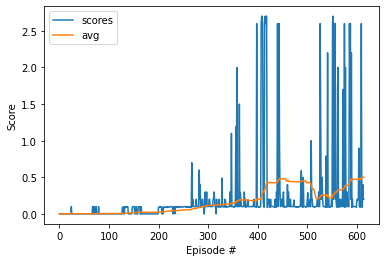

In [8]:
#plots
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(scores)
plt.plot(average_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['scores','avg'])
plt.show()

In [9]:
env.close()